# Sentiment Analysis on IMDB Movie Reviews

This notebook provides an interactive walkthrough of the sentiment analysis project.

## Table of Contents
1. [Setup and Imports](#setup)
2. [Load and Explore Data](#data)
3. [Exploratory Data Analysis](#eda)
4. [Text Preprocessing](#preprocessing)
5. [Traditional ML Models](#traditional)
6. [Deep Learning Models](#deep-learning)
7. [Results and Comparison](#results)

## 1. Setup and Imports <a id='setup'></a>

In [2]:
# Install required packages
# !pip install pandas numpy matplotlib seaborn scikit-learn tensorflow datasets wordcloud gensim nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('✓ All packages imported successfully!')

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ All packages imported successfully!


## 2. Load and Explore Data <a id='data'></a>

In [16]:
import os
import pandas as pd
from datasets import load_dataset

# === Load IMDB Dataset ===
print('Loading IMDB dataset...')
dataset = load_dataset('imdb')

# === Convert to pandas ===
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

print(f'Training samples: {len(train_df)}')
print(f'Test samples: {len(test_df)}')
print(f'\nFirst few rows:')
print(train_df.head())

# === Define save path ===
SAVE_DIR = os.path.join('.', 'data',)
os.makedirs(SAVE_DIR, exist_ok=True)  # Create folder if it doesn't exist

# === Save to CSV ===
train_path = os.path.join(SAVE_DIR, 'train.csv')
test_path = os.path.join(SAVE_DIR, 'test.csv')

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print(f"\n✅ Dataset saved to:\n- {train_path}\n- {test_path}")


Loading IMDB dataset...
Training samples: 25000
Test samples: 25000

First few rows:
                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0

✅ Dataset saved to:
- .\data\train.csv
- .\data\test.csv


In [17]:
# Check label distribution
print('Label distribution:')
print(train_df['label'].value_counts())
print(f'\nClass balance: {train_df["label"].value_counts(normalize=True)}')

Label distribution:
label
0    12500
1    12500
Name: count, dtype: int64

Class balance: label
0    0.5
1    0.5
Name: proportion, dtype: float64


In [18]:
# Sample reviews
print('Positive Review Example:')
print(train_df[train_df['label'] == 1]['text'].iloc[0][:500])
print('\n' + '='*80 + '\n')
print('Negative Review Example:')
print(train_df[train_df['label'] == 0]['text'].iloc[0][:500])

Positive Review Example:
Zentropa has much in common with The Third Man, another noir-like film set among the rubble of postwar Europe. Like TTM, there is much inventive camera work. There is an innocent American who gets emotionally involved with a woman he doesn't really understand, and whose naivety is all the more striking in contrast with the natives.<br /><br />But I'd have to say that The Third Man has a more well-crafted storyline. Zentropa is a bit disjointed in this respect. Perhaps this is intentional: it is 


Negative Review Example:
I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can ab

## 3. Exploratory Data Analysis <a id='eda'></a>

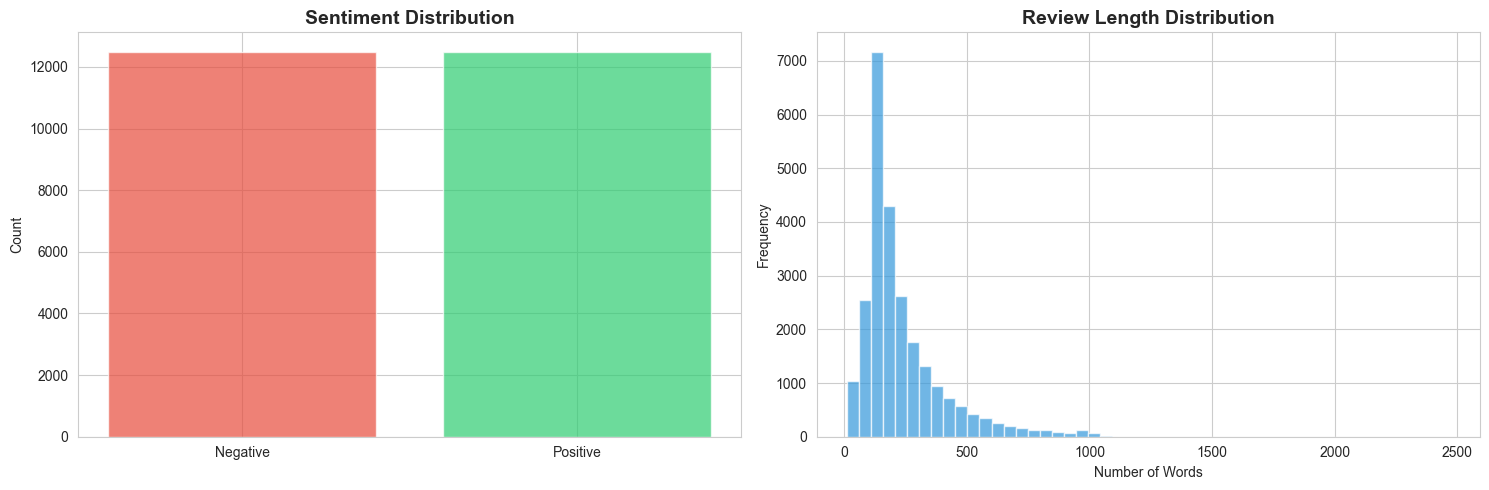

In [19]:
# Calculate review lengths
train_df['review_length'] = train_df['text'].apply(lambda x: len(x.split()))

# Plot sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sentiment counts
sentiment_counts = train_df['label'].value_counts()
axes[0].bar(['Negative', 'Positive'], sentiment_counts.values, color=['#e74c3c', '#2ecc71'], alpha=0.7)
axes[0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')

# Review length distribution
axes[1].hist(train_df['review_length'], bins=50, color='#3498db', alpha=0.7)
axes[1].set_title('Review Length Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
# Review length statistics
print('Review Length Statistics:')
print(train_df['review_length'].describe())

Review Length Statistics:
count    25000.000000
mean       233.787200
std        173.733032
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: review_length, dtype: float64


## 4. Text Preprocessing <a id='preprocessing'></a>

In [22]:
# Run preprocessing script
# This will create preprocessed data files
!python ../scripts/03_preprocessing.py

TEXT PREPROCESSING AND EMBEDDING COMPARISON

[1/5] Loading data...

[2/5] Preprocessing text data...
  - Processing training data...


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

Training:   0%|          | 0/25000 [00:00<?, ?it/s]Traceback (most recent call last):
  File "c:\Users\HP\OneDrive\Desktop\Sentiment Analysis\scripts\03_preprocessing.py", line 34, in <module>
    train_df['cleaned_text'] = [preprocessor.preprocess(text) for text in tqdm(train_df['text'], desc="Training")]
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Desktop\Sentiment Analysis\scripts\03_preprocessing.py", line 34, in <listcomp>
    train_df['cleaned_text'] = [preprocessor.preprocess(text) for text in tqdm(train_df['text'], desc="Training")]
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\OneDrive\Desktop\Sentiment Analysis\utils\preprocessing.py", line 90, in preprocess
    tokens = self.tokenize(text)


In [11]:
# Load preprocessed data
train_preprocessed = pd.read_csv('../data/train_preprocessed.csv')
test_preprocessed = pd.read_csv('../data/test_preprocessed.csv')

# Compare original vs preprocessed
idx = 0
print('Original Text:')
print(train_df['text'].iloc[idx][:300])
print('\n' + '='*80 + '\n')
print('Preprocessed Text:')
print(train_preprocessed['cleaned_text'].iloc[idx][:300])

FileNotFoundError: [Errno 2] No such file or directory: '../data/train_preprocessed.csv'

## 5. Traditional ML Models <a id='traditional'></a>

In [ ]:
# Train traditional ML models
!python ../scripts/04_traditional_ml.py

In [ ]:
# Load and display results
trad_ml_results = pd.read_csv('../results/traditional_ml/model_comparison.csv')
print('Traditional ML Model Comparison:')
trad_ml_results

## 6. Deep Learning Models <a id='deep-learning'></a>

In [ ]:
# Train deep learning models
!python ../scripts/05_deep_learning.py

In [ ]:
# Load and display results
dl_results = pd.read_csv('../results/deep_learning/model_comparison.csv')
print('Deep Learning Model Comparison:')
dl_results

## 7. Results and Comparison <a id='results'></a>

In [ ]:
# Run final evaluation
!python ../scripts/07_final_evaluation.py

In [ ]:
# Load comprehensive comparison
all_results = pd.read_csv('../results/final_evaluation/all_models_comparison.csv')
print('All Models Comparison (sorted by F1-Score):')
all_results

In [ ]:
# Visualize comparison
from IPython.display import Image
Image(filename='../results/final_evaluation/all_models_comparison.png')

## Conclusion

This notebook demonstrated a comprehensive sentiment analysis project comparing traditional ML and deep learning approaches. Key findings:

1. **Traditional ML** (Logistic Regression) achieves ~87-89% accuracy with fast training
2. **Deep Learning** (LSTM) achieves ~88-90% accuracy with longer training time
3. **TF-IDF** works well with traditional ML
4. **Word2Vec** provides better semantic understanding for deep learning
5. **Trade-offs** exist between accuracy, speed, and interpretability

For production deployment, Logistic Regression offers the best balance of performance and efficiency.